In [ ]:
#data manipulation and visualisation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#variables normalisation
from scipy.stats import boxcox

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#import hyperparameter tuning library
from sklearn.model_selection import GridSearchCV

#other libraries
import math
from collections import Counter

In [ ]:
data = pd.read_csv('/content/riceClassification.csv')

In [ ]:
data.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data.shape

(18185, 12)

In [ ]:
data.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
data.nunique(axis=0)

id                 18185
Area                5343
MajorAxisLength    18185
MinorAxisLength    18185
Eccentricity       18185
ConvexArea          5450
EquivDiameter       5343
Extent             18007
Perimeter          16246
Roundness          18184
AspectRation       18185
Class                  2
dtype: int64

In [ ]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [ ]:
#check, whether there are duplicate rows
print("From all {all} rows, {num} of them are unique.".format(all = len(data),num = len(data.id.unique())))


From all 18185 rows, 18185 of them are unique.


In [ ]:
#datatypes of all present attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
data = data.drop(columns = 'id', axis = 1)

In [ ]:
#normalization of all attributes with outliers
columns = data.columns
columns = [c for c in columns if c not in ['Extent', 'Class']]

for col in columns:
    data[col] = boxcox(x=data[col])[0]

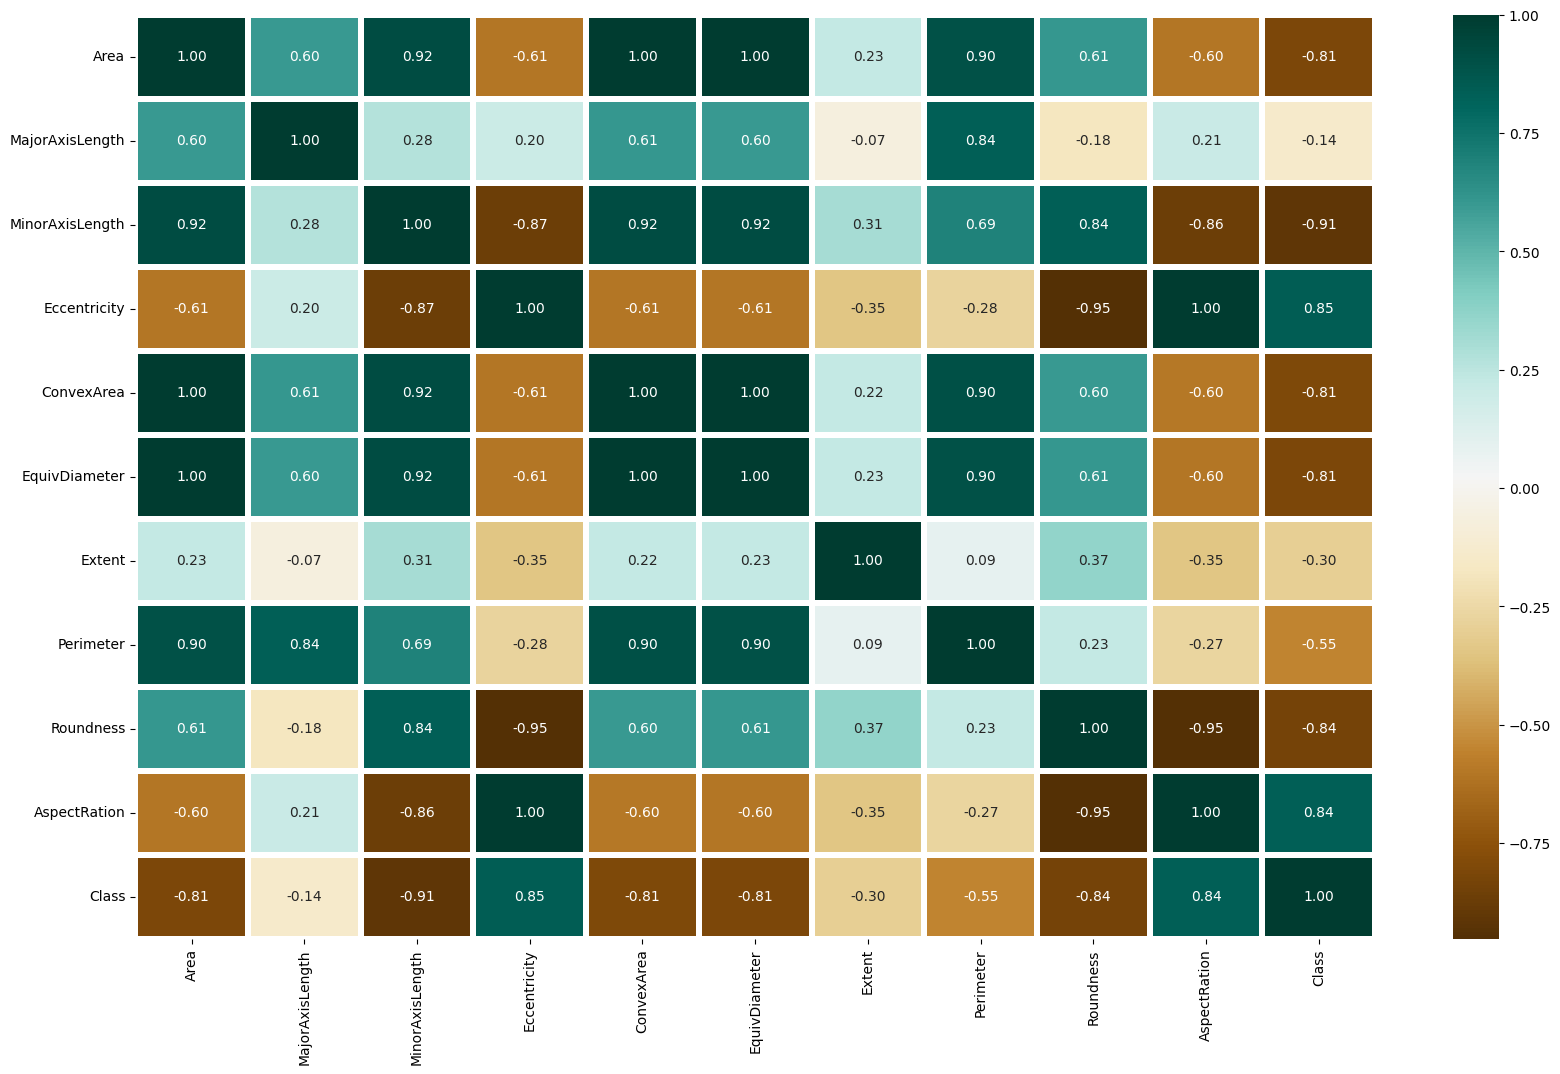

In [ ]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [ ]:
columns = data.columns
columns = [c for c in columns if c not in ['Class']]
y = data['Class'] 
X = data[columns]

In [ ]:
#data = data.drop(['ConvexArea','EquivDiameter'], axis = 1)

In [ ]:
#preparation of train and test data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1) #70 % of train data, 30 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12729, 10), (5456, 10), (12729,), (5456,))

[[1956  504]
 [1306 1690]]


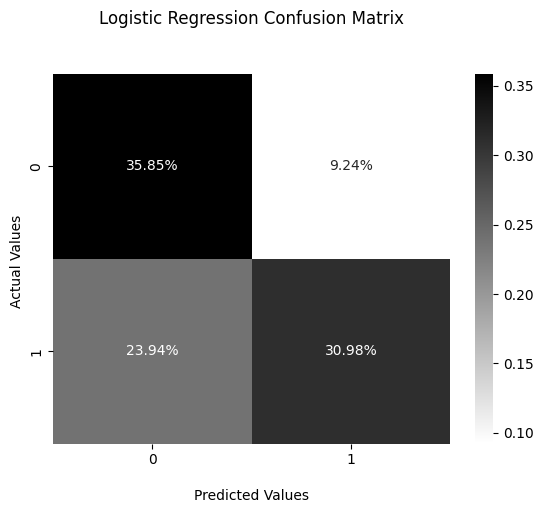

In [ ]:
#implementing Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#evaluation of Logistic Regression: metrics pivot chart
print(classification_report(y_test, y_pred_lr))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_lr),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_lr),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_lr),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_lr),3)))

              precision    recall  f1-score   support

           0       0.60      0.80      0.68      2460
           1       0.77      0.56      0.65      2996

    accuracy                           0.67      5456
   macro avg       0.68      0.68      0.67      5456
weighted avg       0.69      0.67      0.67      5456

Accuracy Score : 0.668
Precision Score : 0.77
Recall Score : 0.564
F-Score : 0.651


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
clf_svm = SVC()

# Train the classifier on the training data
clf_svm.fit(X_train, y_train)

# Test the classifier on the testing data
acc_svm = clf_svm.score(X_test, y_test)

print("SVM Accuracy:", acc_svm)


SVM Accuracy: 0.5751466275659824


In [ ]:
# Test the classifier on the testing data
y_pred_svm = clf_svm.predict(X_test)

# Calculate the classification report
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Classification Report:")
print(report_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47      2460
           1       0.59      0.71      0.65      2996

    accuracy                           0.58      5456
   macro avg       0.57      0.56      0.56      5456
weighted avg       0.57      0.58      0.57      5456



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
clf_lr = LogisticRegression()

# Train the classifier on the training data
clf_lr.fit(X_train, y_train)

# Test the classifier on the testing data
acc_lr = clf_lr.score(X_test, y_test)

print("Logistic Regression Accuracy:", acc_lr)


Logistic Regression Accuracy: 0.6682551319648093


In [ ]:
from sklearn.metrics import classification_report

# Test the classifier on the testing data
y_pred_lr = clf_lr.predict(X_test)

# Calculate the classification report
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Classification Report:")
print(report_lr)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.80      0.68      2460
           1       0.77      0.56      0.65      2996

    accuracy                           0.67      5456
   macro avg       0.68      0.68      0.67      5456
weighted avg       0.69      0.67      0.67      5456

